In [2130]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
RANDOM_STATE=42

In [2131]:
import seaborn as sns

# Проверка данных, замена пропусков.

In [2132]:
data_train = pd.read_csv('train_sales_predict.csv')

In [2133]:
data_train.head()

,id,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,...,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,price
0,0,2011-1,560,NaN,2,59,3,0,30.0,1.0,...,0,0,0,0,0,0,0,0,0,4510000
1,1,2011-1,667,NaN,10,50,2,1,25.0,NaN,...,0,0,0,0,0,0,0,0,0,13231000
2,2,2011-1,90,0.0,1,48,2,0,25.0,0.0,...,0,0,0,0,0,0,0,0,0,2008000
3,3,2011-1,94,1.0,3,62,3,1,30.0,NaN,...,0,0,0,0,0,0,0,0,0,12680000
4,4,2011-1,232,0.0,3,60,3,0,25.0,NaN,...,0,0,0,0,0,0,0,0,0,3335000


In [2134]:
#удалим искомую колонку
target_column = data_train[['price']]
data_train.drop('price', axis=1, inplace=True)

In [2136]:
del data_train['id']

In [2137]:
data_train.shape

(100000, 23)

In [2138]:
data_train.head()

,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,n_photos,...,kw4,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13
0,2011-1,560,NaN,2,59,3,0,30.0,1.0,5,...,0,0,0,0,0,0,0,0,0,0
1,2011-1,667,NaN,10,50,2,1,25.0,NaN,1,...,0,0,0,0,0,0,0,0,0,0
2,2011-1,90,0.0,1,48,2,0,25.0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
3,2011-1,94,1.0,3,62,3,1,30.0,NaN,3,...,0,0,0,0,0,0,0,0,0,0
4,2011-1,232,0.0,3,60,3,0,25.0,NaN,3,...,0,0,0,0,0,0,0,0,0,0


In [2139]:
data_train.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        100000 non-null  object 
 1   street_id   100000 non-null  int64  
 2   build_tech  70265 non-null   float64
 3   floor       100000 non-null  int64  
 4   area        100000 non-null  int64  
 5   rooms       100000 non-null  int64  
 6   balcon      100000 non-null  int64  
 7   metro_dist  95104 non-null   float64
 8   g_lift      70008 non-null   float64
 9   n_photos    100000 non-null  int64  
 10  kw1         100000 non-null  int64  
 11  kw2         100000 non-null  int64  
 12  kw3         100000 non-null  int64  
 13  kw4         100000 non-null  int64  
 14  kw5         100000 non-null  int64  
 15  kw6         100000 non-null  int64  
 16  kw7         100000 non-null  int64  
 17  kw8         100000 non-null  int64  
 18  kw9         100000 non-null  int64  
 19  kw1

In [2140]:
data_train.isna().sum()

date              0
street_id         0
build_tech    29735
floor             0
area              0
rooms             0
balcon            0
metro_dist     4896
g_lift        29992
n_photos          0
kw1               0
kw2               0
kw3               0
kw4               0
kw5               0
kw6               0
kw7               0
kw8               0
kw9               0
kw10              0
kw11              0
kw12              0
kw13              0
dtype: int64

У колонок g_lift и build_tech пропущена треть 1/3 значений, нет смысла их отставлять. Удалим их

In [2141]:
del data_train['g_lift']
del data_train['build_tech']

Осталась колонка metro_dist. Заполним пропущенные значения

In [2142]:
data_train['metro_dist'].unique()

array([30., 25., 20., 15., 10., nan,  0.,  5.])

In [2143]:
#посмотрим возможные значения для вставки
data_train['metro_dist'].median(), data_train['metro_dist'].mean(), data_train['metro_dist'].mode()

(25.0,
 22.154430938761777,
 0    30.0
 Name: metro_dist, dtype: float64)

Посмотрим распределения со вставленными значениями

C:\Users\79252\AppData\Local\Temp\ipykernel_21816\2218872790.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


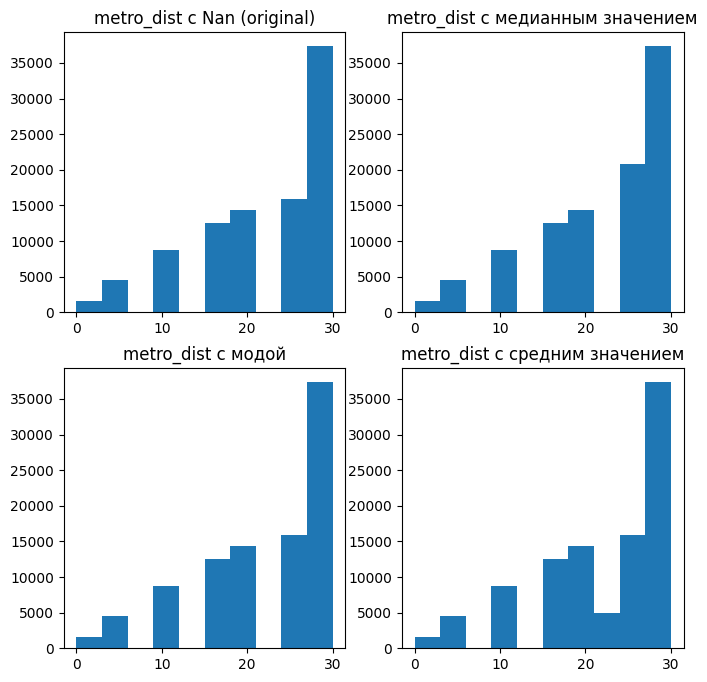

In [2144]:
metro_dist_median = data_train['metro_dist'].fillna(data_train['metro_dist'].median())
metro_dist_mean = data_train['metro_dist'].fillna(data_train['metro_dist'].mean())
metro_dist_mode = data_train['metro_dist'].fillna(data_train['metro_dist'].mode())


fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (8,8))


ax[0,0].hist(data_train['metro_dist'] )
ax[0,0].set_title('metro_dist с Nan (original)')

ax[0,1].hist(metro_dist_median)
ax[0,1].set_title('metro_dist с медианным значением')

ax[1,1].hist(metro_dist_mean )
ax[1,1].set_title('metro_dist с средним значением')

ax[1,0].hist(metro_dist_mode)
ax[1,0].set_title('metro_dist с модой')
fig.show()


в данном случае распределение почти не меняется, если заполнять пропуски медианой, так что оставляем ее. Мода (самое частое значение)- это как раз пропуски, так что ее поставить мы не можем

In [2145]:
data_train['metro_dist'] = data_train['metro_dist'].fillna(data_train['metro_dist'].median())


In [2146]:
data_train.isna().sum()

date          0
street_id     0
floor         0
area          0
rooms         0
balcon        0
metro_dist    0
n_photos      0
kw1           0
kw2           0
kw3           0
kw4           0
kw5           0
kw6           0
kw7           0
kw8           0
kw9           0
kw10          0
kw11          0
kw12          0
kw13          0
dtype: int64

теперь все колонки без пропущенных значений

# Кодировка категориальных значений, нормализация данных

In [2147]:
for col in data_train.columns:
    print(col, data_train[f'{col}'].value_counts().shape[0])

date 18
street_id 672
floor 25
area 115
rooms 6
balcon 3
metro_dist 7
n_photos 12
kw1 2
kw2 2
kw3 2
kw4 2
kw5 2
kw6 2
kw7 2
kw8 2
kw9 2
kw10 2
kw11 2
kw12 2
kw13 2


C:\Users\79252\AppData\Local\Temp\ipykernel_21816\3072162055.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_train.corr())


''

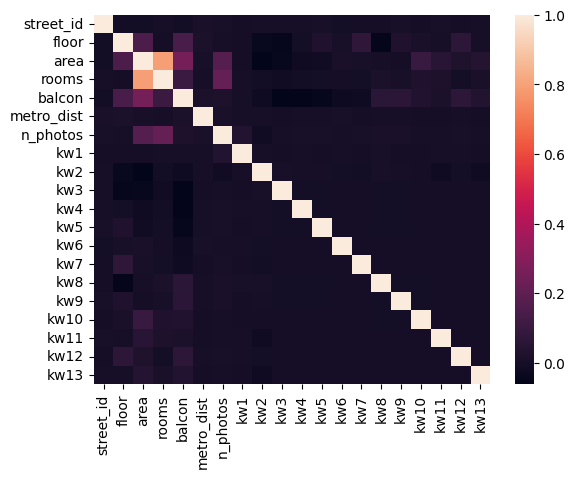

In [2148]:
sns.heatmap(data_train.corr())
;

Отдельно посмотрим на дату

In [2149]:
data_train.date.value_counts()

2011-4     5671
2011-10    5662
2011-11    5652
2012-10    5603
2012-2     5597
2012-12    5589
2012-1     5588
2011-9     5583
2011-6     5582
2011-1     5578
2011-5     5568
2011-2     5546
2011-8     5546
2012-11    5513
2011-7     5500
2011-3     5482
2011-12    5475
2012-3     5265
Name: date, dtype: int64

Значений в дате не так много, но в тестовой части могут попасться те даты, которых до этого не было. Переведем в численный вид

In [2150]:
#закодируем дату
data_train['date'] = ( data_train['date'].str[:4].astype(int).apply(lambda x: 12 if x==2012 else 1) ) * (data_train['date'].str[5:].astype(int))

Теперь дата - это номер месяца (начало от 01.2011)
Оставим числа по возрастанию, чтобы сохранить последовательность

In [2151]:
data_train['date'] 

0         1
1         1
2         1
3         1
4         1
         ..
99995    36
99996    36
99997    36
99998    36
99999    36
Name: date, Length: 100000, dtype: int64

rooms и floor уже закодированы LabelEncoder, оставим, чтобы сохранить порядок

In [2152]:
cat_cols_to_OHE = ['balcon','n_photos','metro_dist'] #   можно закодировать one_hot_encoding
cat_cols_many_values = ['street_id','area'] #слишком много колонок получится при ohe, будем пробовать другие методы
# ['floor', 'rooms'] уже закодированы как LabelEncoding, надо только нормализовать

In [2153]:
data_train = pd.get_dummies(data_train , columns= cat_cols_to_OHE)

In [2154]:
data_train.head()

,date,street_id,floor,area,rooms,kw1,kw2,kw3,kw4,kw5,...,n_photos_9,n_photos_10,n_photos_11,metro_dist_0.0,metro_dist_5.0,metro_dist_10.0,metro_dist_15.0,metro_dist_20.0,metro_dist_25.0,metro_dist_30.0
0,1,560,2,59,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,667,10,50,2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,90,1,48,2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,94,3,62,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,232,3,60,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [2155]:
from sklearn.preprocessing import MinMaxScaler

In [2156]:
scaler =  MinMaxScaler() #отнормируем данные
data_train[['street_id','date','floor', 'rooms', 'area']] = scaler.fit_transform(data_train[['street_id','date','floor', 'rooms', 'area'] ])

In [2157]:
data_train

,date,street_id,floor,area,rooms,kw1,kw2,kw3,kw4,kw5,...,n_photos_9,n_photos_10,n_photos_11,metro_dist_0.0,metro_dist_5.0,metro_dist_10.0,metro_dist_15.0,metro_dist_20.0,metro_dist_25.0,metro_dist_30.0
0,0.000000,0.834575,0.041667,0.159574,0.4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.000000,0.994039,0.375000,0.111702,0.2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.000000,0.134128,0.000000,0.101064,0.2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.000000,0.140089,0.083333,0.175532,0.4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.000000,0.345753,0.083333,0.164894,0.4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.244755,0.597615,0.166667,0.005319,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
99996,0.244755,0.087928,0.125000,0.026596,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
99997,0.244755,0.377049,0.083333,0.122340,0.2,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
99998,0.244755,0.454545,0.083333,0.808511,0.8,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


# Обучение моделей

In [2158]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  ElasticNet 
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [2159]:
data_train.columns

Index(['date', 'street_id', 'floor', 'area', 'rooms', 'kw1', 'kw2', 'kw3',
       'kw4', 'kw5', 'kw6', 'kw7', 'kw8', 'kw9', 'kw10', 'kw11', 'kw12',
       'kw13', 'balcon_0', 'balcon_1', 'balcon_2', 'n_photos_0', 'n_photos_1',
       'n_photos_2', 'n_photos_3', 'n_photos_4', 'n_photos_5', 'n_photos_6',
       'n_photos_7', 'n_photos_8', 'n_photos_9', 'n_photos_10', 'n_photos_11',
       'metro_dist_0.0', 'metro_dist_5.0', 'metro_dist_10.0',
       'metro_dist_15.0', 'metro_dist_20.0', 'metro_dist_25.0',
       'metro_dist_30.0'],
      dtype='object')

In [2160]:
X_train, X_val, y_train, y_val = train_test_split(data_train , target_column , random_state=RANDOM_STATE, train_size=0.8)

Воспользуемся линейной регрессией с Ridge + Lasso = ElasticNet регуляризацией

In [2161]:
lin_reg = ElasticNet() 

In [2162]:
lin_reg.fit(X_train, y_train)

ElasticNet()

In [2163]:
mean_absolute_error(y_train, lin_reg.predict(X_train)), mean_absolute_error(y_val, lin_reg.predict(X_val))

(2562601.75706351, 2548234.4096679473)

Будем отталкиваться от этого значения score. В данном случае модель не переобучилась

Загрузим тестовые данные, обработаем их

In [2164]:
data_test = pd.read_csv('test_sales_predict.csv')

In [2165]:
data_test

,id,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,...,kw4,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13
0,100000,2012-3,459,NaN,1,60,3,1,30.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,100001,2012-3,344,1.0,10,52,2,1,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,100002,2012-3,585,0.0,4,54,3,0,30.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,100003,2012-3,494,NaN,2,52,2,1,25.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,100004,2012-3,622,1.0,9,60,3,1,15.0,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,199995,2013-9,613,1.0,2,34,1,1,25.0,NaN,...,0,0,0,0,0,0,0,0,0,0
99996,199996,2013-9,167,1.0,10,61,3,1,30.0,NaN,...,0,0,0,0,0,0,0,0,0,0
99997,199997,2013-9,391,1.0,9,34,1,1,30.0,NaN,...,0,0,0,0,0,0,0,0,0,0
99998,199998,2013-9,21,0.0,7,58,3,0,30.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [2166]:
data_test.isna().sum()

id                0
date              0
street_id         0
build_tech    30020
floor             0
area              0
rooms             0
balcon            0
metro_dist     5117
g_lift        29814
n_photos          0
kw1               0
kw2               0
kw3               0
kw4               0
kw5               0
kw6               0
kw7               0
kw8               0
kw9               0
kw10              0
kw11              0
kw12              0
kw13              0
dtype: int64

In [2167]:
id_test = data_test['id']

In [2168]:
del data_test['id']
del data_test['g_lift']
del data_test['build_tech']


In [2169]:
for col in data_test.columns:
    print(col, data_test[f'{col}'].value_counts().shape[0])

date 19
street_id 672
floor 25
area 114
rooms 6
balcon 3
metro_dist 7
n_photos 12
kw1 2
kw2 2
kw3 2
kw4 2
kw5 2
kw6 2
kw7 2
kw8 2
kw9 2
kw10 2
kw11 2
kw12 2
kw13 2


In [2170]:
data_test['metro_dist'] = data_test['metro_dist'].fillna(data_test['metro_dist'].median()) #как и в train, заменим пропуски медианой

In [2171]:
data_test = pd.get_dummies(data_test, columns=cat_cols_to_OHE)
data_test.head()

,date,street_id,floor,area,rooms,kw1,kw2,kw3,kw4,kw5,...,n_photos_9,n_photos_10,n_photos_11,metro_dist_0.0,metro_dist_5.0,metro_dist_10.0,metro_dist_15.0,metro_dist_20.0,metro_dist_25.0,metro_dist_30.0
0,2012-3,459,1,60,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2012-3,344,10,52,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2012-3,585,4,54,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2012-3,494,2,52,2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2012-3,622,9,60,3,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [2172]:
data_test['date'] = ( data_test['date'].str[:4].astype(int).apply(lambda x: 12 if x==2012 else 1) ) * (data_test['date'].str[5:].astype(int)) #преобразуем дату по той же схеме, что и в train

In [2173]:
data_test[['street_id','date','floor', 'rooms', 'area']] = scaler.transform(data_test[['street_id','date','floor', 'rooms', 'area']])

In [2174]:
data_test.head()

,date,street_id,floor,area,rooms,kw1,kw2,kw3,kw4,kw5,...,n_photos_9,n_photos_10,n_photos_11,metro_dist_0.0,metro_dist_5.0,metro_dist_10.0,metro_dist_15.0,metro_dist_20.0,metro_dist_25.0,metro_dist_30.0
0,0.244755,0.684054,0.000000,0.164894,0.4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.244755,0.512668,0.375000,0.122340,0.2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.244755,0.871833,0.125000,0.132979,0.4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.244755,0.736215,0.041667,0.122340,0.2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0.244755,0.926975,0.333333,0.164894,0.4,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [2175]:
result_lin_reg = pd.DataFrame(
 {
     'id' : id_test,
     'price' :lin_reg.predict(data_test)
 }
)
result_lin_reg.set_index('id',inplace=True)

In [2176]:
result_lin_reg

,price
id,
100000,5.850884e+06
100001,6.012635e+06
100002,4.720257e+06
100003,5.653911e+06
100004,5.869875e+06
...,...
199995,5.392379e+06
199996,5.765141e+06
199997,5.394851e+06


In [2177]:
result_lin_reg.to_csv('result_ElasticNet.csv')

Попробуем случайный лес в качестве регрессора

In [2178]:
random_forest_model = RandomForestRegressor()

In [2179]:
random_forest_model.fit(X_train, y_train)

C:\Users\79252\AppData\Local\Temp\ipykernel_21816\3109229370.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_model.fit(X_train, y_train)


RandomForestRegressor()

In [2180]:
mean_absolute_error(y_train, random_forest_model.predict(X_train))

622963.140602381

In [2181]:
mean_absolute_error(y_val, random_forest_model.predict(X_val))

1661787.559347619

Случайный лес очень сильно переобучается

Пробуем градиентный бустинг - catboost 

In [2182]:
from catboost import CatBoostRegressor

In [2202]:
catboost_model = CatBoostRegressor(iterations=1200,loss_function='RMSE') 

Loss по RMSE показывает лучшие результаты в leaderboard,чем по MAE, поэтому оставим такой loss

In [2203]:
catboost_model.fit(X_train, y_train)

Learning rate set to 0.070549
0:	learn: 4061310.2581984	total: 8.67ms	remaining: 10.4s
1:	learn: 3938996.3204795	total: 15.9ms	remaining: 9.55s
2:	learn: 3830603.6505996	total: 24.5ms	remaining: 9.78s
3:	learn: 3732235.3946205	total: 33.2ms	remaining: 9.93s
4:	learn: 3643388.0048957	total: 41.6ms	remaining: 9.94s
5:	learn: 3565938.9654536	total: 49.7ms	remaining: 9.9s
6:	learn: 3496121.4266432	total: 57.8ms	remaining: 9.86s
7:	learn: 3432970.4981883	total: 64.4ms	remaining: 9.59s
8:	learn: 3372957.2685544	total: 71.3ms	remaining: 9.43s
9:	learn: 3319413.4986499	total: 80.8ms	remaining: 9.62s
10:	learn: 3274143.8888348	total: 88.6ms	remaining: 9.57s
11:	learn: 3234465.9974588	total: 97.4ms	remaining: 9.64s
12:	learn: 3195228.6017332	total: 105ms	remaining: 9.61s
13:	learn: 3162583.6604855	total: 113ms	remaining: 9.61s
14:	learn: 3131149.2458734	total: 120ms	remaining: 9.5s
15:	learn: 3103455.7630175	total: 129ms	remaining: 9.53s
16:	learn: 3079586.9093114	total: 135ms	remaining: 9.37s
1

In [2204]:
mean_absolute_error(y_train, catboost_model.predict(X_train))

1420922.1807096747

In [2205]:
mean_absolute_error(y_val, catboost_model.predict(X_val))

1483332.137308848

Самый хороший скор, по сравнению с линейной регрессией и случайным лесом. Переобучения почти нет

In [2206]:
result_catboost = pd.DataFrame(
 {
     'id' : id_test,
     'price' :catboost_model.predict(data_test)
 }
)
result_catboost.set_index('id',inplace=True)


In [2207]:
result_catboost.to_csv('catboost_model.csv')

Модель предсказывает хорошо, попробуем обучить полностью на train выборке

In [2208]:
catboost_model.fit(data_train, target_column)

Learning rate set to 0.073081
0:	learn: 4046407.3958431	total: 8.23ms	remaining: 9.87s
1:	learn: 3920571.1162346	total: 15.5ms	remaining: 9.26s
2:	learn: 3809662.7370572	total: 23ms	remaining: 9.19s
3:	learn: 3708645.5478859	total: 30.7ms	remaining: 9.18s
4:	learn: 3617929.8116526	total: 38.5ms	remaining: 9.2s
5:	learn: 3536702.4090884	total: 47ms	remaining: 9.35s
6:	learn: 3466087.7773201	total: 54.2ms	remaining: 9.24s
7:	learn: 3401510.7565704	total: 60.9ms	remaining: 9.08s
8:	learn: 3345474.9766766	total: 67.5ms	remaining: 8.93s
9:	learn: 3292779.3675189	total: 75.5ms	remaining: 8.98s
10:	learn: 3245583.3709529	total: 82.2ms	remaining: 8.88s
11:	learn: 3206036.8090282	total: 89.3ms	remaining: 8.84s
12:	learn: 3169266.7369242	total: 96.5ms	remaining: 8.81s
13:	learn: 3137590.5035847	total: 103ms	remaining: 8.77s
14:	learn: 3108185.3588103	total: 111ms	remaining: 8.78s
15:	learn: 3081187.8899157	total: 118ms	remaining: 8.76s
16:	learn: 3058653.4995935	total: 126ms	remaining: 8.73s
17:

In [2210]:
result_catboost = pd.DataFrame(
 {
     'id' : id_test,
     'price' :catboost_model.predict(data_test)
 }
)
result_catboost.set_index('id',inplace=True)
result_catboost.to_csv('catboost_model_all.csv')